# Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/task1_dataset_kotae.csv")
df

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89
...,...,...,...,...,...
111535170,99999,74,38,119,77
111535171,99999,74,39,132,94
111535172,99999,74,40,124,105
111535173,99999,74,41,121,107


In [3]:
print(df['x'].max(),df['x'].min())
print(df['y'].max(),df['x'].min())
print(df['t'].max(),df['t'].min())

200 1
200 1
47 0


In [4]:
count_table = df.value_counts(['x', 'y','t','d']).reset_index(name='number of people')

In [5]:
count_table

,x,y,t,d,number of people
0,135,77,36,68,301
1,135,77,36,66,297
2,135,77,37,68,296
3,135,77,36,54,295
4,135,77,36,26,295
...,...,...,...,...,...
39081331,1,1,0,54,1
39081332,1,1,0,46,1
39081333,1,1,0,45,1
39081334,1,1,0,40,1


In [6]:
count_table_for_analyse = df.value_counts(['x', 'y']).reset_index(name='number of people')


In [7]:
count_table_for_analyse

,x,y,number of people
0,135,77,359963
1,135,82,196083
2,134,77,176167
3,129,81,151722
4,135,78,140375
...,...,...,...
34027,122,165,1
34028,44,126,1
34029,200,168,1
34030,122,178,1


## 選擇前三大的地點

In [8]:
count_table_for_analysis = count_table_for_analyse

# 1. 找出 'number of people' 欄位值前三大的資料
top_3_locations = count_table_for_analysis.nlargest(3, 'number of people')

print("人口數前三多的地點 (x, y):")
print(top_3_locations)
print("-" * 30)

# 2. 從這三筆資料中選取 'x' 和 'y' 欄位，用於後續的匹配
locations_to_find = top_3_locations[['x', 'y']]

# 3. 使用 merge 方法，根據 x 和 y 找出在 count_table 中所有符合的資料
#    'how='inner'' 表示只保留兩個 DataFrame 中 x, y 組合都存在的資料列
result_df = pd.merge(count_table, locations_to_find, on=['x', 'y'], how='inner')

print("在 count_table 中找到符合前三多地點 (x, y) 的所有資料:")
result_df

人口數前三多的地點 (x, y):
     x   y  number of people
0  135  77            359963
1  135  82            196083
2  134  77            176167
------------------------------
在 count_table 中找到符合前三多地點 (x, y) 的所有資料:


,x,y,t,d,number of people
0,135,77,36,68,301
1,135,77,36,66,297
2,135,77,37,68,296
3,135,77,36,54,295
4,135,77,36,26,295
...,...,...,...,...,...
10792,134,77,6,15,1
10793,134,77,6,8,1
10794,134,77,6,2,1
10795,134,77,5,56,1


## Reshape 資料

### 1. 將 t 轉為小時

In [9]:
import numpy as np
import pandas as pd

# 1. 建立樞紐分析表 (Pivot Table)
# Index: 地點(x, y) 和 天數(d)
# Columns: 時間(t)
# Values: 人數
pivot_df = result_df.pivot_table(index=['x', 'y', 'd'], columns='t', values='number of people', fill_value=0)

# 2. 確保所有時間點 (0-47) 都存在，若原本資料某些時間點完全沒人，補 0
pivot_df = pivot_df.reindex(columns=np.arange(48), fill_value=0)

# 3. 將半小時資料合併為一小時 (Sum)
# 0-47 (48 slots) -> 0-23 (24 slots)
# axis=1 代表對欄位進行操作
data_hourly = pivot_df.groupby(lambda t: t // 2, axis=1).sum()

print("資料轉換完成！")
print("資料維度 (樣本數, 24小時):", data_hourly.shape)
data_hourly.head()

資料轉換完成！
資料維度 (樣本數, 24小時): (225, 24)


C:\Users\undertaker\AppData\Local\Temp\ipykernel_42684\697145748.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_hourly = pivot_df.groupby(lambda t: t // 2, axis=1).sum()


t           0     1     2     3     4     5     6      7      8      9   ...  \
x   y  d                                                                 ...   
134 77 0  26.0  22.0  17.0  19.0  15.0  22.0  46.0   60.0   86.0   97.0  ...   
       1  13.0  16.0  11.0   7.0  10.0  10.0  49.0   53.0   71.0   88.0  ...   
       2   9.0  13.0  12.0   4.0   7.0  14.0  62.0  161.0  177.0  152.0  ...   
       3  11.0  11.0   9.0   6.0  12.0  15.0  59.0  140.0  213.0  166.0  ...   
       4  15.0  11.0  11.0  15.0  15.0  18.0  78.0  128.0  198.0  172.0  ...   

t            14     15     16     17     18     19     20     21    22    23  
x   y  d                                                                      
134 77 0  151.0  134.0  140.0  129.0  112.0  107.0   74.0   67.0  57.0  41.0  
       1  118.0  116.0  110.0  108.0  107.0   84.0   72.0   40.0  35.0  22.0  
       2  118.0  132.0  136.0  192.0  202.0  133.0  119.0   81.0  60.0  28.0  
       3  142.0  151.0  170.0  203.0  212.0  152.0   97.0  112.0  52.0  38.0  
       4  138.0  144.0  156.0  193.0  181.0  160.0  119.0   99.0  48.0  39.0  

[5 rows x 24 columns]

### 2. 標記 Label

In [10]:
X_list = []
y_list = []

# --- 1. 製作早上的資料 (0-7時) ---
X_morning = data_hourly.loc[:, 0:7].values  # 取出第 0 到 7 欄
y_morning = np.zeros(len(X_morning))        # Label 標記為 0
X_list.append(X_morning)
y_list.append(y_morning)

# --- 2. 製作下午的資料 (8-15時) ---
X_afternoon = data_hourly.loc[:, 8:15].values # 取出第 8 到 15 欄
y_afternoon = np.ones(len(X_afternoon))       # Label 標記為 1
X_list.append(X_afternoon)
y_list.append(y_afternoon)

# --- 3. 製作晚上的資料 (16-23時) ---
X_evening = data_hourly.loc[:, 16:23].values  # 取出第 16 到 23 欄
y_evening = np.full(len(X_evening), 2)        # Label 標記為 2
X_list.append(X_evening)
y_list.append(y_evening)

# --- 合併所有資料 ---
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(f"特徵資料 X 形狀: {X.shape} (樣本數, 8小時人流)")
print(f"標籤資料 y 形狀: {y.shape} (對應的時段標籤)")

特徵資料 X 形狀: (675, 8) (樣本數, 8小時人流)
標籤資料 y 形狀: (675,) (對應的時段標籤)


### 3. 分割訓練集與測試集

In [11]:
import torch
from sklearn.model_selection import train_test_split

# 1. 切分資料：80% 訓練, 20% 測試
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 2. 轉換為 PyTorch Tensor
# 輸入特徵轉為 FloatTensor
X_train = torch.FloatTensor(X_train_np)
X_test = torch.FloatTensor(X_test_np)

# 標籤轉為 LongTensor (整數)，注意：PyTorch CrossEntropyLoss 不需要 One-hot
y_train = torch.LongTensor(y_train_np)
y_test = torch.LongTensor(y_test_np)

print("訓練集 Tensor 形狀:", X_train.shape, y_train.shape)
print("測試集 Tensor 形狀:", X_test.shape, y_test.shape)

訓練集 Tensor 形狀: torch.Size([540, 8]) torch.Size([540])
測試集 Tensor 形狀: torch.Size([135, 8]) torch.Size([135])


# Train

In [12]:
import torch.nn as nn
import torch.optim as optim

# 1. 定義 DNN 模型架構
class TimeClassifier(nn.Module):
    def __init__(self):
        super(TimeClassifier, self).__init__()
        # 定義層數
        self.layer1 = nn.Linear(8, 64)   # 輸入 8 -> 隱藏 64
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.2)   # Dropout 0.2
        self.layer2 = nn.Linear(64, 32)  # 隱藏 64 -> 隱藏 32
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(32, 3)   # 隱藏 32 -> 輸出 3 (類別)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output(x) # 這裡不加 Softmax，因為 CrossEntropyLoss 會內含 LogSoftmax
        return x

# 2. 初始化模型、損失函數與優化器
model = TimeClassifier()
criterion = nn.CrossEntropyLoss()  # 自動包含 Softmax 計算
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 紀錄訓練過程用
history = {'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}

# 3. 開始訓練迴圈
epochs = 50
batch_size = 16
n_samples = X_train.shape[0]
n_batches = n_samples // batch_size

print("開始訓練...")

for epoch in range(epochs):
    
    # --- 訓練階段 (Training) ---
    model.train() # 設定為訓練模式 (開啟 Dropout)
    train_loss = 0.0
    correct_train = 0
    
    # 簡單的 Batch 處理
    permutation = torch.randperm(n_samples)
    
    for i in range(0, n_samples, batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]
        
        # 歸零梯度
        optimizer.zero_grad()
        
        # 前向傳播 (Forward)
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # 反向傳播 (Backward)
        loss.backward()
        optimizer.step()
        
        # 累加 Loss 與計算準確度
        train_loss += loss.item() * batch_x.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == batch_y).sum().item()
        
    avg_train_loss = train_loss / n_samples
    train_acc = correct_train / n_samples
    
    # --- 驗證階段 (Validation) ---
    model.eval() # 設定為評估模式 (關閉 Dropout)
    with torch.no_grad(): # 不計算梯度，節省記憶體
        val_outputs = model(X_test)
        v_loss = criterion(val_outputs, y_test)
        _, val_predicted = torch.max(val_outputs, 1)
        val_acc = (val_predicted == y_test).sum().item() / len(y_test)
        val_loss = v_loss.item()
    
    # 紀錄歷史數據
    history['loss'].append(avg_train_loss)
    history['accuracy'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:.4f}, Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

print("訓練完成！")

開始訓練...
Epoch [5/50], Loss: 0.0734, Acc: 0.9667, Val Loss: 0.0344, Val Acc: 0.9926
Epoch [10/50], Loss: 0.0302, Acc: 0.9907, Val Loss: 0.0373, Val Acc: 0.9926
Epoch [15/50], Loss: 0.0304, Acc: 0.9926, Val Loss: 0.0259, Val Acc: 0.9926
Epoch [20/50], Loss: 0.0216, Acc: 0.9944, Val Loss: 0.0418, Val Acc: 0.9926
Epoch [25/50], Loss: 0.0296, Acc: 0.9907, Val Loss: 0.0237, Val Acc: 0.9926
Epoch [30/50], Loss: 0.0058, Acc: 0.9981, Val Loss: 0.0408, Val Acc: 0.9926
Epoch [35/50], Loss: 0.0096, Acc: 0.9963, Val Loss: 0.0289, Val Acc: 0.9926
Epoch [40/50], Loss: 0.0073, Acc: 0.9963, Val Loss: 0.0432, Val Acc: 0.9926
Epoch [45/50], Loss: 0.0063, Acc: 0.9963, Val Loss: 0.0321, Val Acc: 0.9926
Epoch [50/50], Loss: 0.0046, Acc: 0.9963, Val Loss: 0.0398, Val Acc: 0.9926
訓練完成！


# 視覺化實驗結果

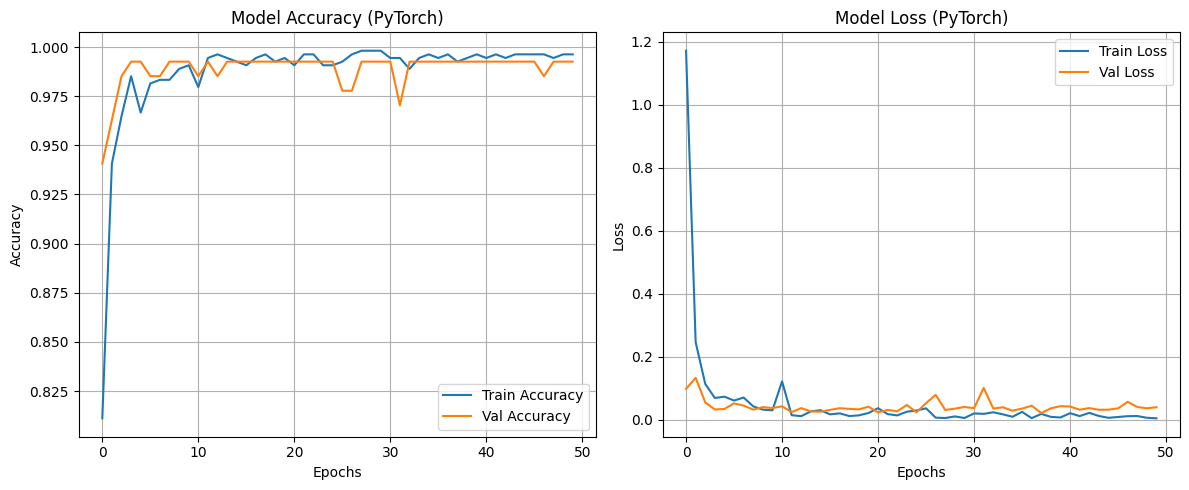

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 繪製準確率 (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy (PyTorch)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 繪製損失 (Loss)
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Model Loss (PyTorch)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 儲存並載入模型

## 儲存模型

In [14]:
import os

# 1. 設定儲存路徑與檔名
save_dir = '../models'
model_name = 'dnn_time_classifier.pth'
save_path = os.path.join(save_dir, model_name)

# 2. 檢查資料夾是否存在，不存在則建立
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"已建立資料夾: {save_dir}")

# 3. 儲存模型參數 (State Dictionary)
# 推薦使用 state_dict，因為它只儲存權重參數，不包含模型結構定義，比較輕量且安全
torch.save(model.state_dict(), save_path)

print(f"模型已成功儲存至: {save_path}")

模型已成功儲存至: ../models\dnn_time_classifier.pth


## 載入模型

In [15]:
# 1. 必須先重新實例化與原本一樣的模型架構
loaded_model = TimeClassifier() 

# 2. 載入剛才儲存的權重
loaded_model.load_state_dict(torch.load('../models/dnn_time_classifier.pth'))

# 3. 設定為評估模式 (重要！這會固定 Dropout 和 Batch Normalization)
loaded_model.eval()

print("模型載入成功！")

模型載入成功！


# 繪製 Confusion Matrix

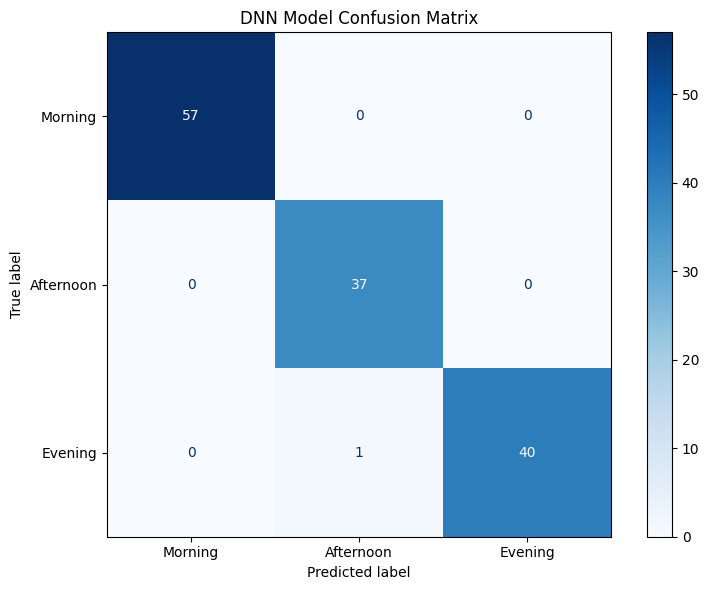

✅ Confusion Matrix 已儲存至 ../models/confusion_matrix_dnn.png


In [16]:
# ✅ 新增：繪製 DNN Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 使用載入的模型或原始模型進行預測
model_to_eval = loaded_model if 'loaded_model' in dir() else model
model_to_eval.eval()

with torch.no_grad():
    y_pred_logits = model_to_eval(X_test)
    y_pred = torch.argmax(y_pred_logits, dim=1).numpy()

y_true = y_test.numpy()

# 計算 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 繪製並儲存
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Morning', 'Afternoon', 'Evening'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title('DNN Model Confusion Matrix')

plt.tight_layout()
plt.savefig('../models/confusion_matrix_dnn.png', dpi=150)
plt.show()

print("✅ Confusion Matrix 已儲存至 ../models/confusion_matrix_dnn.png")